## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [64]:
import numpy as np

In [1]:
%%capture
!pip install torch
import torch

In [2]:
import pandas as pd

# load dataframe from CSV file
data = pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')



In [3]:
data.shape

(30165, 2)

In [4]:
data.loc[0,'text']

"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur ste

In [5]:
%%capture
!pip install seaborn

<Axes: xlabel='count', ylabel='category'>

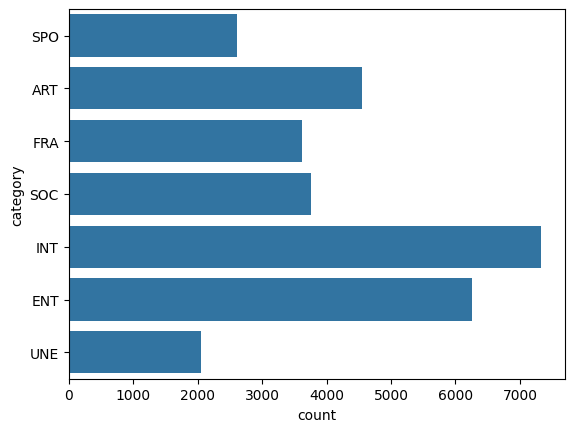

In [6]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=data,y='category')
# YOUR CODE HERE

In [7]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
data.sample(n=4)# YOUR CODE HERE


,text,category
24385,le royaume-uni rejoint les etats-unis dans la mise sur pied d'un dispositif militaire dans le golfe préalable à une éventuelle intervention en irak signe le plus révélateur des préparatifs britanniques en cours le départ annoncé pour samedi 11 janvier de portsmouth du porte-aéronefs avions à décollage court ou vertical et hélicoptères ark-royal probablement accompagné d'une frégate d'un sous-marin nucléaire d'attaque et de deux bâtiments de soutien officiellement créée pour des exercices dans le golfe et l'océan indien cette escadre retrouvera la frégate lance-missiles cardiff déjà présente dans la zone elle précédera l'envoi annoncé par londres à la mi-décembre 2002 d'une flottille de quatre dragueurs de mines mobilisation de réservistes d'ici à la fin de la semaine le ministère britannique de la défense doit encore annoncer la mobilisation d'environ 7 000 réservistes la presse d'outre-manche laisse entendre que le dispositif britannique pourrait réunir quelque 20 000 hommes à terme dans la région avant les opérations en afghanistan à l'automne 2001 le royaume-uni avait agi préventivement de la même façon en vue de prêter main forte à son allié américain dans le même temps washington continue de masser des forces troupes avions et navires dans le golfe et les pays riverains où déjà sont stationnés plus de 70 000 hommes et où croisent un groupe aéronaval autour du porte-avions constellation et un groupe d'assaut amphibie autour du nassau un second porte-avions le harry-truman navigue en méditerranée le pentagone a demandé à la marine américaine de tenir prêts ses porte-avions george-washington basé à norfolk en virginie abraham-lincoln à perth en australie et kitty-hawk au japon indépendamment de ces préparatifs un groupe d'assaut amphibie autour du porte-hélicoptères tarawa et un navire-hôpital de 1 000 lits le comfort ont quitté lundi 6 janvier leur port d'attache aux etats-unis pour une mission d'une durée possible de six mois dans le golfe et en océan indien pour les semaines qui viennent le pentagone prévoit de convoquer 10 000 réservistes il a commencé le déploiement dans le golfe de 11 000 hommes d'une division d'infanterie en garnison en georgie et de plusieurs centaines de spécialistes du génie et du renseignement transférés d'allemagne des unités du corps des marines en californie et en caroline du nord sont en partance pour le koweït qui accueille déjà plus de 10 000 soldats américains postés aux frontières de l'irak d'ici au 27 janvier date de la remise de leur rapport par les inspecteurs de l'onu en désarmement les etats-unis devraient avoir aligné plus de 100 000 hommes avec leurs blindés 200 avions de combat de l'armée de l'air au sol autant d'avions d'attaque embarqués une dizaine de bombardiers lourds b-52 et b-2 à diego garcia en océan indien et des centaines d'hélicoptères fin février les effectifs américains pourraient avoir doublé et dès lors représenter la moitié du contingent 550 000 hommes réuni en 1991 par la coalition internationale anti-saddam hussein,INT
12950,le conseil de discipline de l'administration de la ville de paris examinera le mardi 2 décembre le cas de fatima senouci une assistante sociale d'éducation dont bertrand delanoë a réclamé l'exclusion temporaire sans traitement la fonctionnaire que ses activités contraignent à travailler en contact permanent avec le public est voilée sur son lieu de travail depuis août 2000 le monde du 14 octobre dans un communiqué le maire de paris souligne que la jeune femme manifeste ses croyances religieuses de manière déplacée en refusant notamment de serrer la main d'interlocuteurs masculins il justifie sa décision par le fait qu'elle n'a pas modifié son comportement après avoir reçu un blâme en janvier 2001 et que toutes les voies du dialogue ont été épuisées cette attitude estime m. delanoë constitue un manquement à l'obligation de neutralité qui s'impose à tout agent de l'administration ainsi qu'au principe de laïcité qui s'appliqu

In [8]:
%%capture
!pip install wordcloud
from wordcloud import WordCloud

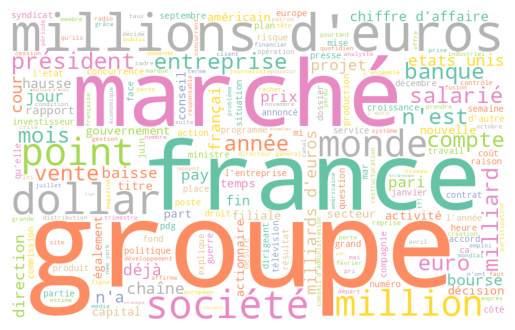

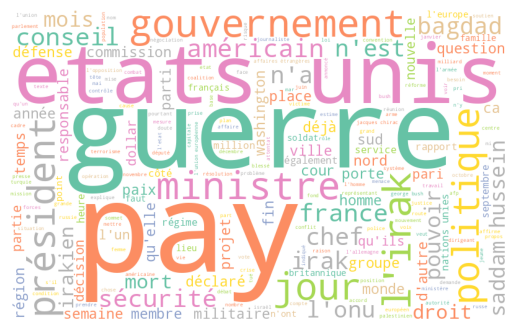

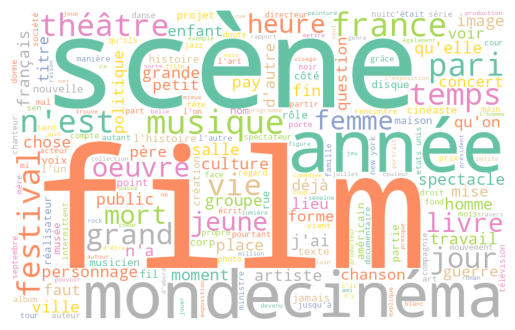

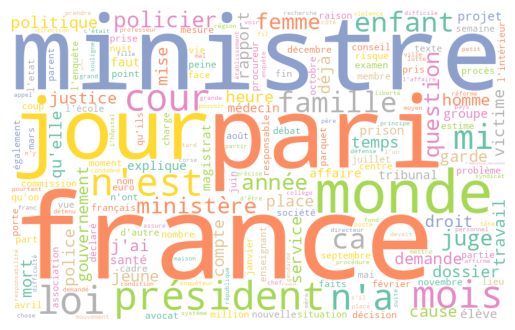

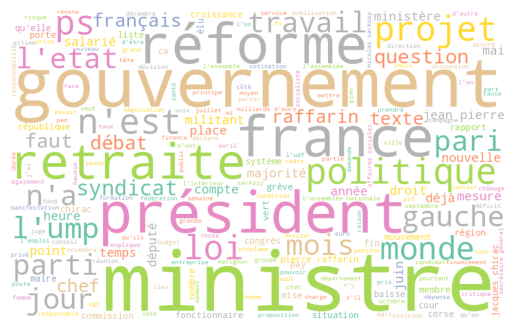

In [9]:
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    data_temp = data[data['category']==cat]
    list_ind = list(data_temp.index)
    whole_words = ''
    for i in list_ind:
        content = data_temp.loc[i,'text']
        content = str(content)
        tokens = content.split()
        whole_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800,
                          height = 500,
                          background_color ='white',
                          random_state = 21,
                          stopwords = STOPWORDS,
                          colormap='Set2').generate(whole_words)
 
# plot the WordCloud image                       
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.show()
 # YOUR CODE HERE


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [12]:
%%capture
!pip install scikit-learn
import sklearn

In [13]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE


X_train, X_test, y_train, y_test = train_test_split(data['text'],data['category'],test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test,y_test,test_size=0.5)

In [14]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(24132,)
(3017,)
(24132,)
(3017,)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_dev_counts = vectorizer.transform(X_dev)
# fit on train data

# apply it on train and dev data


In [16]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts,y_train)

# Evaluate 


MultinomialNB()

In [17]:
print('for training : ',clf.score(X_train_counts,y_train),'\n',
      'for dev : ', clf.score(X_dev_counts,y_dev), '\n',
      'for test : ', clf.score(X_test_counts,y_test))

for training :  0.7283689706613625 
 for dev :  0.7204907161803713 
 for test :  0.7205833609545906


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

In [19]:
clf_tf = MultinomialNB()
clf_tf.fit(X_train_tf,y_train)

MultinomialNB()

In [20]:
clf_tf.score(X_train_tf,y_train)

0.7450273495773247

In [21]:
clf_tf.score(X_dev_tf,y_dev)

0.7393899204244032

In [22]:
clf_tf.score(X_test_tf,y_test)

0.7398077560490554

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE
y_pred_train_tf = clf_tf.predict(X_train_tf)
y_pred_test_tf = clf_tf.predict(X_test_tf)
y_pred_dev_tf = clf_tf.predict(X_dev_tf)


In [24]:
print(classification_report(y_true=y_train,y_pred=y_pred_train_tf))

              precision    recall  f1-score   support

         ART       0.74      0.88      0.81      3650
         ENT       0.76      0.86      0.81      4996
         FRA       0.64      0.68      0.66      2843
         INT       0.76      0.88      0.82      5893
         SOC       0.68      0.60      0.64      3014
         SPO       0.93      0.73      0.82      2093
         UNE       0.50      0.00      0.01      1643

    accuracy                           0.75     24132
   macro avg       0.72      0.66      0.65     24132
weighted avg       0.73      0.75      0.72     24132



In [25]:
from sklearn.metrics import confusion_matrix

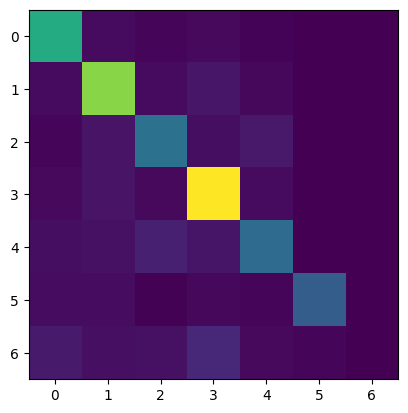

In [26]:
plt.imshow(confusion_matrix(y_true=y_train,y_pred=y_pred_train_tf))

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

/tmp/ipykernel_1211/912901811.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_bis['category'].replace(to_replace='FRA',value='SOC',inplace=True)


<Axes: xlabel='count', ylabel='category'>

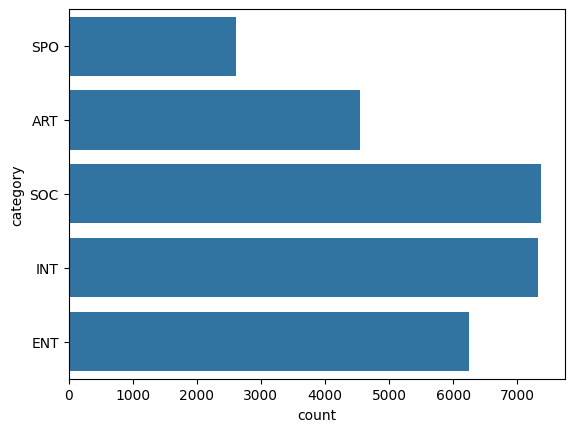

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

data_bis = data[data['category']!='UNE'].copy()
data_bis['category'].replace(to_replace='FRA',value='SOC',inplace=True)

# Plot the statistics of classes
sns.countplot(data=data_bis,y='category')

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [28]:
%%capture
!pip install transformers datasets evaluate accelerate

In [38]:
from transformers import pipeline, CamembertModel, CamembertTokenizer

In [45]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [93]:
candidate_labels = ["art", "entreprise", "france", "international", "societe", "sport", "page frontale"]
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

Device set to use cuda:0


In [53]:
data.groupby('category').count()

,text
category,
ART,4552
ENT,6251
FRA,3616
INT,7328
SOC,3755
SPO,2608
UNE,2055


In [54]:
test_set_llm = data.sample(n=100)

In [55]:
test_set_llm.reset_index(inplace=True,drop=True)

In [95]:
dict_conv = {'art':'ART','entreprise':'ENT','france':'FRA',
             'international':'INT','societe':'SOC','sport':'SPO',
            'page frontale':'UNE'}
dict_conv_out = {0:'ART',1:'ENT',2:'FRA',
             3:'INT',4:'SOC',5:'SPO',
            6:'UNE'}
test_set_llm['output'] = test_set_llm['category'].copy()

In [97]:
for i in range(100):
    sequence_to_classify = test_set_llm.loc[i,'text']
    output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
    true_out = output['labels'][0]
    test_set_llm.loc[i,'output'] = true_out

In [98]:
for i in range(100):
    test_set_llm.loc[i,'output'] = dict_conv[test_set_llm.loc[i,'output']]

In [100]:
acc = 0
for i in range(100):
    if test_set_llm.loc[i,'output'] == test_set_llm.loc[i,'category']:
        acc += 1

In [101]:
acc/100

0.24